In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [2]:
dataframe = []
path = 'dataset/sales'
all_files = glob.glob(os.path.join(path,'*.csv'))
for files in all_files:
    df = pd.read_csv(files)
    dataframe.append(df)
df = pd.concat(dataframe, ignore_index = True)

In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
105259,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
105260,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
105261,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105263 entries, 0 to 105262
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          104950 non-null  object
 1   Product           104950 non-null  object
 2   Quantity Ordered  104950 non-null  object
 3   Price Each        104950 non-null  object
 4   Order Date        104950 non-null  object
 5   Purchase Address  104950 non-null  object
dtypes: object(6)
memory usage: 4.8+ MB


In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,104950,104950,104950,104950,104950,104950
unique,100549,20,10,24,80412,87520
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,201,12290,94911,12290,201,201


In [6]:
df.isna().sum()

Order ID            313
Product             313
Quantity Ordered    313
Price Each          313
Order Date          313
Purchase Address    313
dtype: int64

In [7]:
df.dropna(how = 'all', inplace = True)

In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
102624,220392,Lightning Charging Cable,1,14.95,06/08/19 17:13,"472 8th St, Portland, ME 04101"
102688,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
103128,220882,Lightning Charging Cable,1,14.95,06/13/19 17:53,"588 Lake St, Boston, MA 02215"
103997,221711,Bose SoundSport Headphones,1,99.99,06/15/19 16:36,"139 West St, New York City, NY 10001"


In [10]:
df = df.loc[df['Order ID'].str.startswith('Or') == False]


In [11]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\3876843441.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
C:\Users\amil\AppData\Local\Temp\ipykernel_12712\3876843441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\3841238190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')


In [14]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors = 'coerce')

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\978620097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors = 'coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104749 entries, 0 to 105262
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          104749 non-null  object        
 1   Product           104749 non-null  object        
 2   Quantity Ordered  104749 non-null  int64         
 3   Price Each        104749 non-null  float64       
 4   Order Date        104749 non-null  datetime64[ns]
 5   Purchase Address  104749 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [16]:
df['month'] = df['Order Date'].dt.month

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\2290699359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].dt.month


In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6


In [18]:
df['month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6])

In [19]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\1983597858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


In [20]:
month_grp = df.groupby('month', as_index = False)['Sales'].sum()

In [21]:
month_grp

,month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,3207.50
3,4,3385499.82
4,5,10559.29
5,6,2575264.92
6,7,2647775.76
7,8,2244467.88
8,9,2096.74
9,12,4610626.83


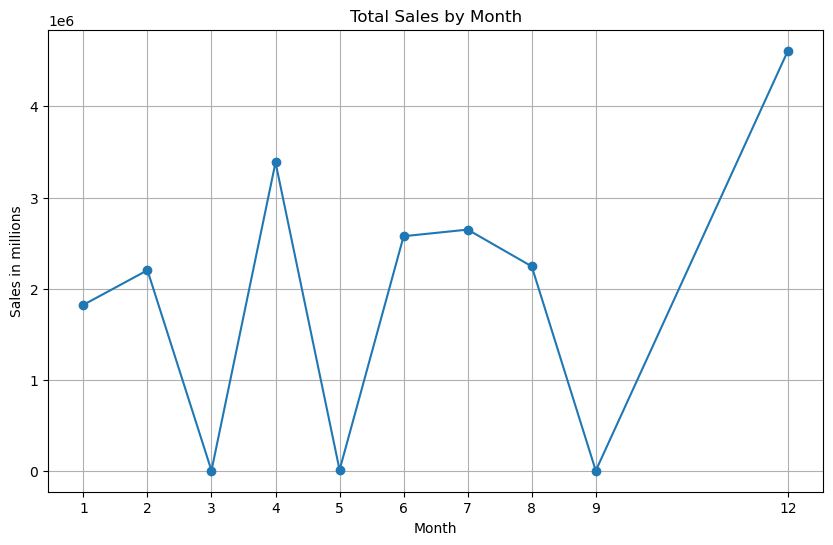

In [22]:

plt.figure(figsize=(10, 6))
plt.plot(month_grp['month'], month_grp['Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales in millions')
plt.title('Total Sales by Month')
plt.grid(True)
plt.xticks(month_grp['month'])  # Set x-ticks to match months
plt.show()

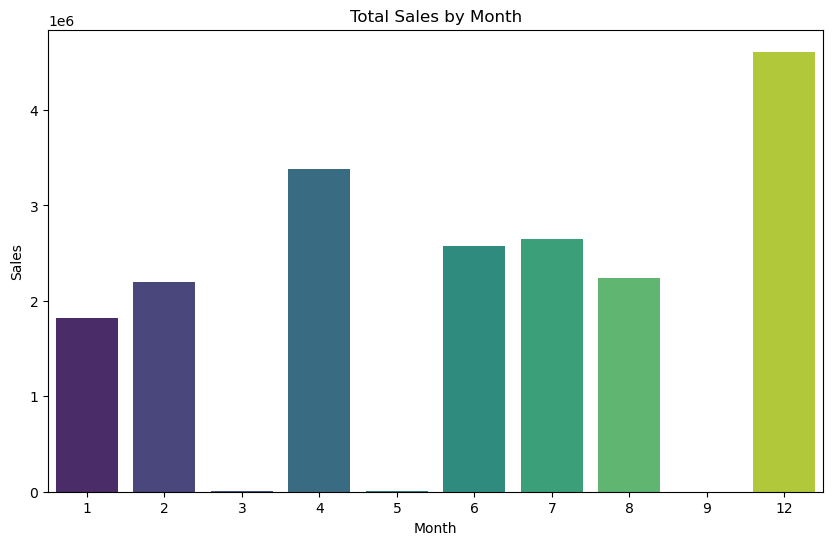

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='Sales', data=month_grp, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Month')
plt.show()


In [24]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95


In [25]:
city = df['Purchase Address'].str.split(',').str[1]
city

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
105258            Boston
105259     New York City
105260     San Francisco
105261     San Francisco
105262           Atlanta
Name: Purchase Address, Length: 104749, dtype: object

In [26]:
state = df['Purchase Address'].str.split(',').str[2:3].str[0].str.strip(' ').str[:2]
state

0         TX
2         MA
3         CA
4         CA
5         CA
          ..
105258    MA
105259    NY
105260    CA
105261    CA
105262    GA
Name: Purchase Address, Length: 104749, dtype: object

In [27]:
df['city'] = city + '(' + state +')'

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\3217053030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = city + '(' + state +')'


In [28]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston(MA)
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City(NY)
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco(CA)
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco(CA)


In [29]:
city_grp = df.groupby('city', as_index = False)['Quantity Ordered'].sum()
city_grp

,city,Quantity Ordered
0,Atlanta(GA),9314
1,Austin(TX),6265
2,Boston(MA),12587
3,Dallas(TX),9332
4,Los Angeles(CA),18676
5,New York City(NY),15847
6,Portland(ME),1594
7,Portland(OR),6328
8,San Francisco(CA),28545
9,Seattle(WA),9296


<Axes: xlabel='city', ylabel='Quantity Ordered'>

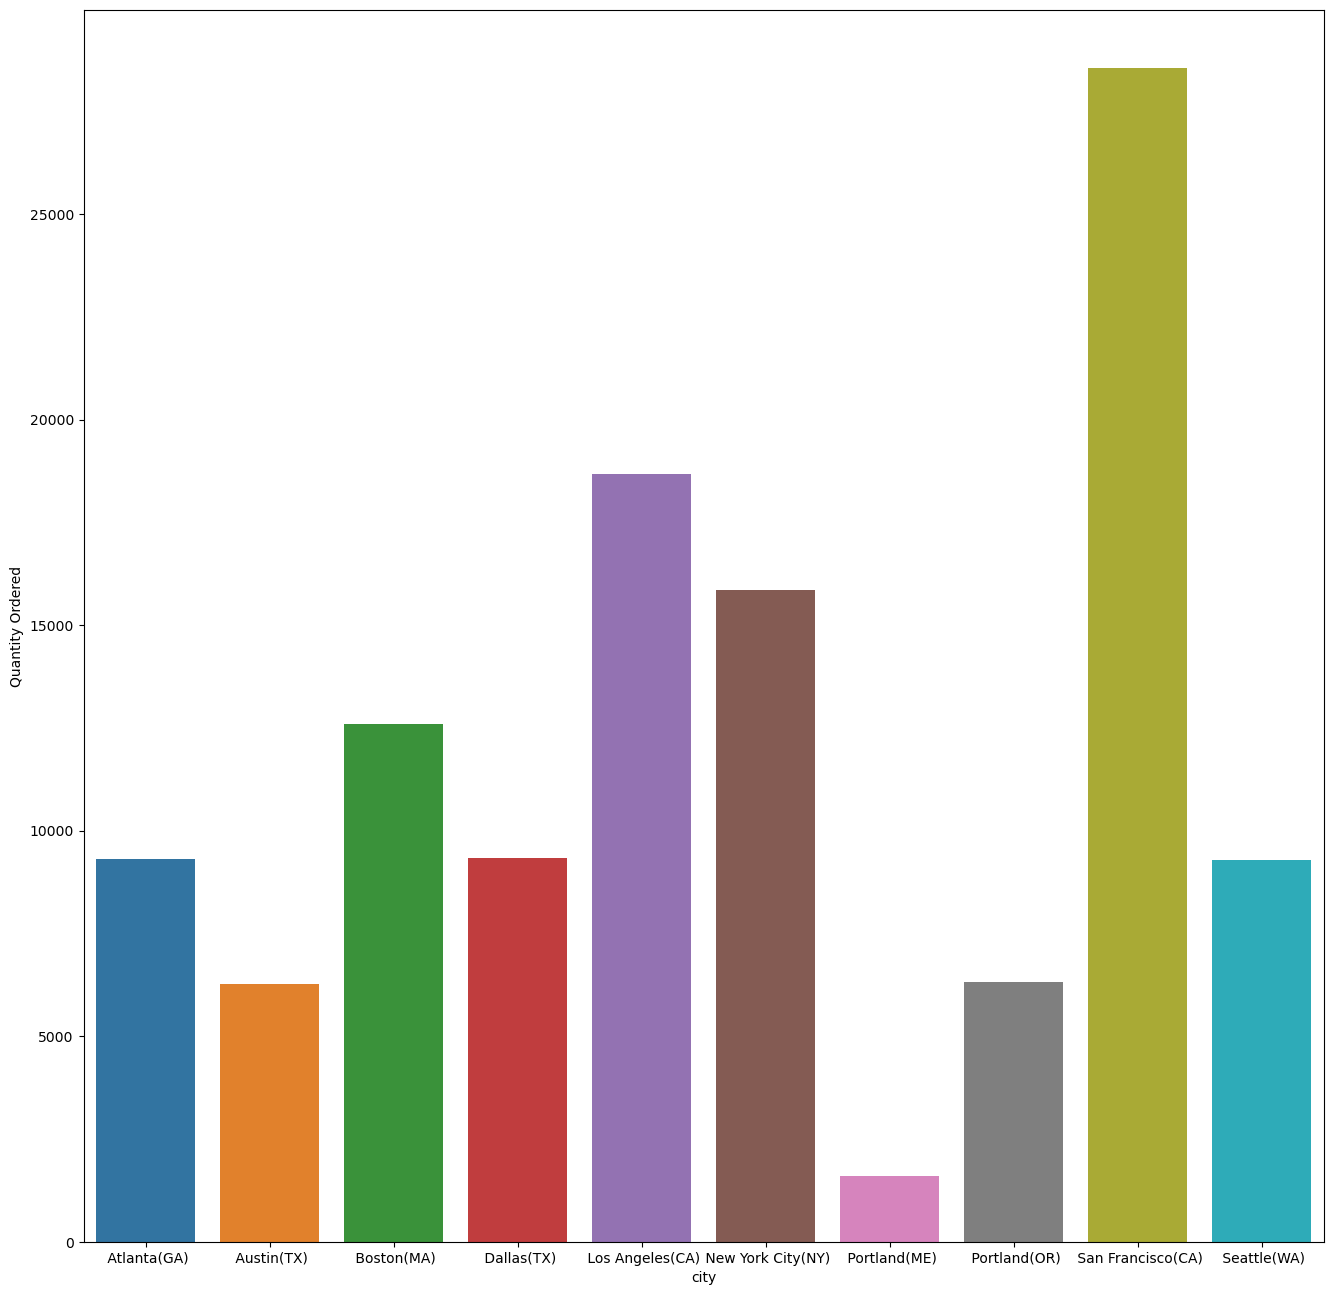

In [30]:
plt.figure(figsize=(16, 16))
sns.barplot(data = city_grp, x = 'city', y ='Quantity Ordered')


In [31]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston(MA)
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City(NY)
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco(CA)
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco(CA)


In [32]:
df['hours'] = df['Order Date'].dt.hour

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\572387693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours'] = df['Order Date'].dt.hour


In [33]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9
...,...,...,...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston(MA),19
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City(NY),19
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco(CA),18
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco(CA),18


In [34]:
hr_grp = df.groupby('hours',as_index = False)['Sales'].count()
hr_grp

,hours,Sales
0,0,2200
1,1,1308
2,2,697
3,3,474
4,4,496
5,5,774
6,6,1397
7,7,2292
8,8,3598
9,9,4947


C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


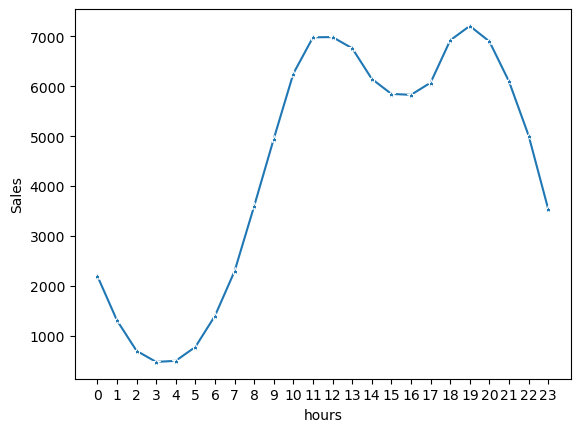

In [35]:
sns.lineplot(data = hr_grp, x ='hours', y = 'Sales',marker = '*')
plt.xticks(hr_grp['hours']) 
plt.show()

In [36]:
df[df['Order ID'].duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hours
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11
...,...,...,...,...,...,...,...,...,...,...
105233,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles(CA),11
105235,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City(NY),12
105236,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City(NY),12
105255,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City(NY),22


In [37]:
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\3473584435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [38]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hours,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston(MA),19,AAA Batteries (4-pack)
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City(NY),19,27in FHD Monitor
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco(CA),18,USB-C Charging Cable
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco(CA),18,USB-C Charging Cable


In [39]:
df.drop_duplicates(inplace = True)

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [40]:
dff = df[df['grouped'].str.contains(',')]
df[df['Order ID'].duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hours,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco(CA),17,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
105233,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles(CA),11,"Apple Airpods Headphones,AA Batteries (4-pack)"
105235,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City(NY),12,"Google Phone,USB-C Charging Cable"
105236,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City(NY),12,"Google Phone,USB-C Charging Cable"
105255,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City(NY),22,"iPhone,Lightning Charging Cable"


In [41]:
new_df = dff[['Order ID','grouped']]

In [42]:
new_df 

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...
105233,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
105235,222884,"Google Phone,USB-C Charging Cable"
105236,222884,"Google Phone,USB-C Charging Cable"
105255,222903,"iPhone,Lightning Charging Cable"


In [43]:
new_df['count'] = 1
new_df

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\2743260765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['count'] = 1


,Order ID,grouped,count
3,176560,"Google Phone,Wired Headphones",1
4,176560,"Google Phone,Wired Headphones",1
18,176574,"Google Phone,USB-C Charging Cable",1
19,176574,"Google Phone,USB-C Charging Cable",1
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea...",1
...,...,...,...
105233,222882,"Apple Airpods Headphones,AA Batteries (4-pack)",1
105235,222884,"Google Phone,USB-C Charging Cable",1
105236,222884,"Google Phone,USB-C Charging Cable",1
105255,222903,"iPhone,Lightning Charging Cable",1


In [44]:
grpp = new_df.groupby('grouped',as_index = False).count().sort_values(by = 'count', ascending = False)
grpp

,grouped,Order ID,count
299,"iPhone,Lightning Charging Cable",1004,1004
158,"Google Phone,USB-C Charging Cable",966,966
312,"iPhone,Wired Headphones",430,430
263,"Vareebadd Phone,USB-C Charging Cable",356,356
172,"Google Phone,Wired Headphones",344,344
...,...,...,...
57,"34in Ultrawide Monitor,ThinkPad Laptop",2,2
144,"Google Phone,27in 4K Gaming Monitor",2,2
0,"20in Monitor,20in Monitor",1,1
218,"Macbook Pro Laptop,Macbook Pro Laptop",1,1


In [45]:
n= 10
plt_grp = grpp.head(5)
plt_grp

,grouped,Order ID,count
299,"iPhone,Lightning Charging Cable",1004,1004
158,"Google Phone,USB-C Charging Cable",966,966
312,"iPhone,Wired Headphones",430,430
263,"Vareebadd Phone,USB-C Charging Cable",356,356
172,"Google Phone,Wired Headphones",344,344


<Axes: xlabel='grouped', ylabel='count'>

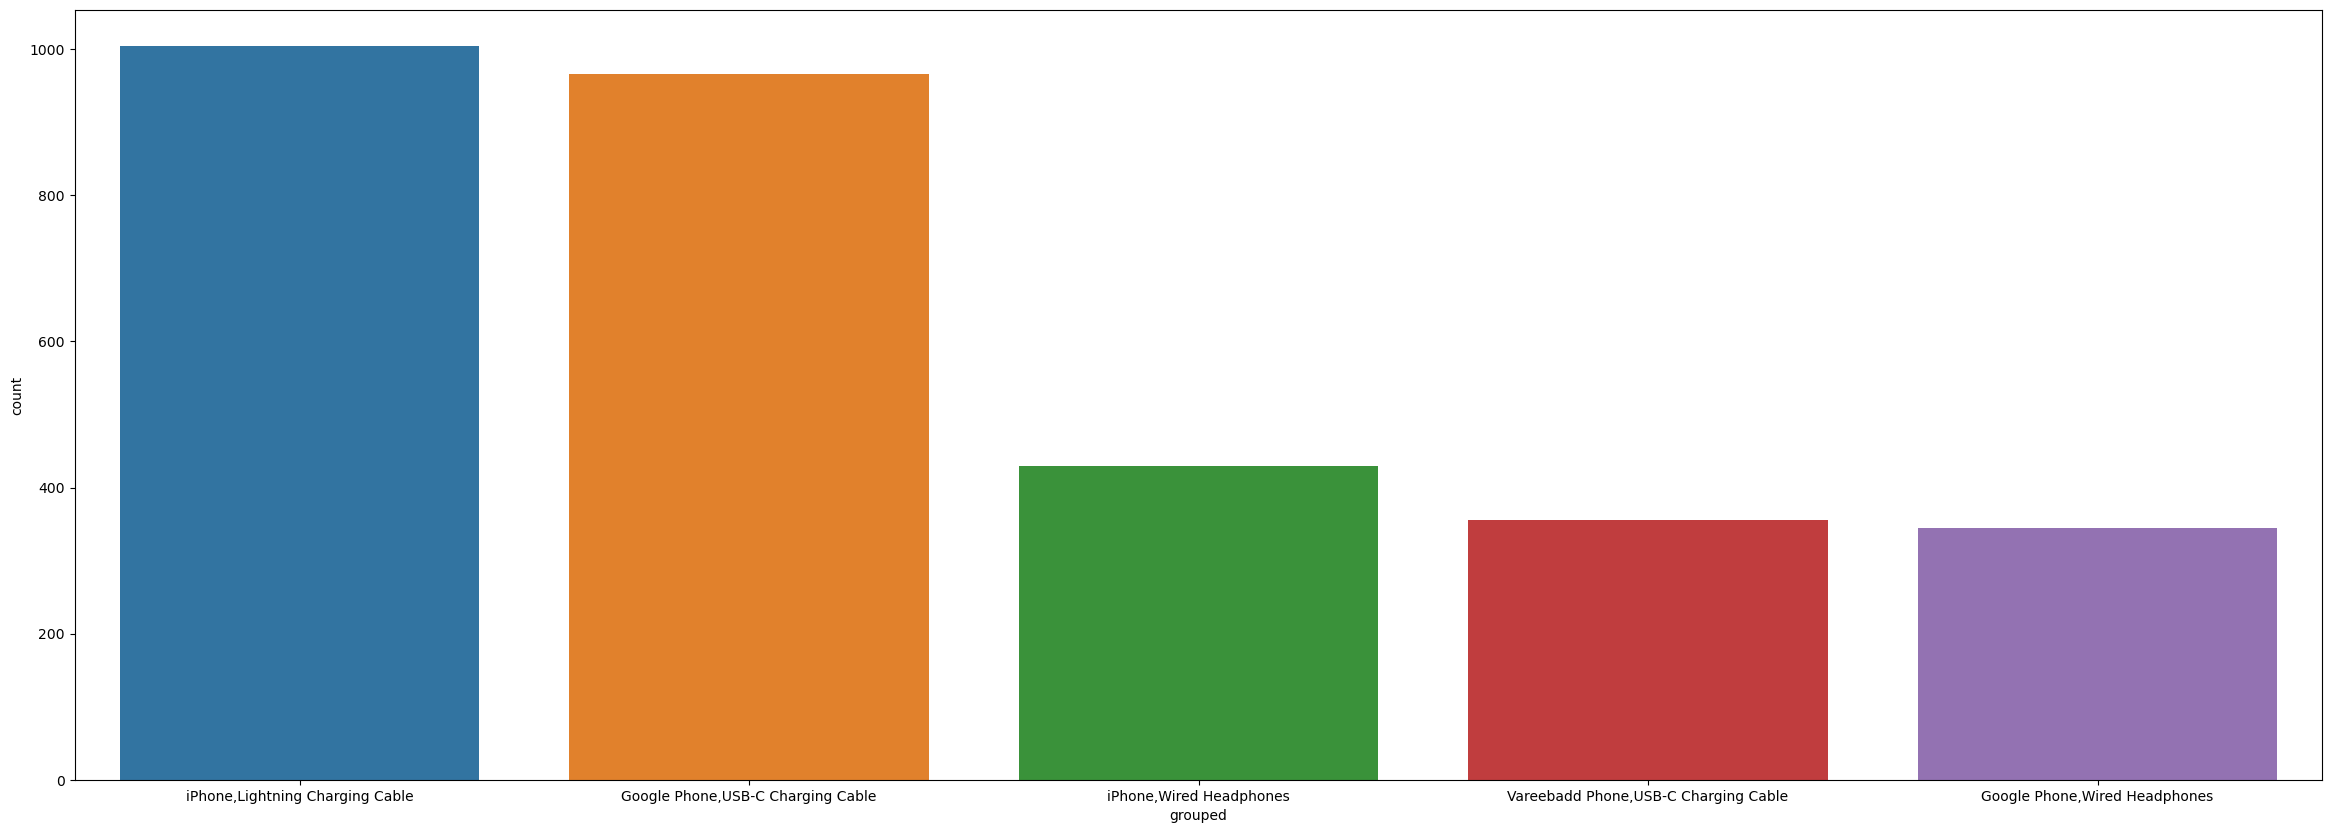

In [46]:
plt.figure(figsize= (29,10))
sns.barplot(data = plt_grp, x= 'grouped', y= 'count'  )

C:\Users\amil\AppData\Local\Temp\ipykernel_12712\2971158377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff['month'])
C:\Users\amil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Density'>

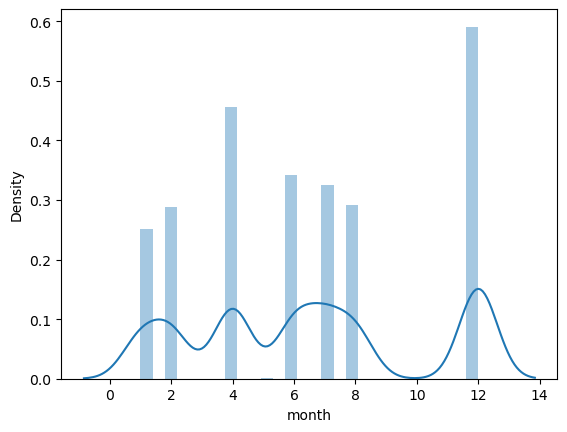

In [47]:

sns.distplot(dff['month'])

In [48]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hours,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...
105258,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston(MA),19,AAA Batteries (4-pack)
105259,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City(NY),19,27in FHD Monitor
105260,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco(CA),18,USB-C Charging Cable
105261,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco(CA),18,USB-C Charging Cable


In [57]:
grp_product = df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by = 'Quantity Ordered', ascending = False)

In [58]:
grp_product

,Product,Quantity Ordered
5,AAA Batteries (4-pack),17278
4,AA Batteries (4-pack),15681
15,USB-C Charging Cable,13424
12,Lightning Charging Cable,13021
17,Wired Headphones,11486
6,Apple Airpods Headphones,8817
7,Bose SoundSport Headphones,7524
2,27in FHD Monitor,4258
18,iPhone,3892
1,27in 4K Gaming Monitor,3536


<Axes: xlabel='Product', ylabel='Quantity Ordered'>

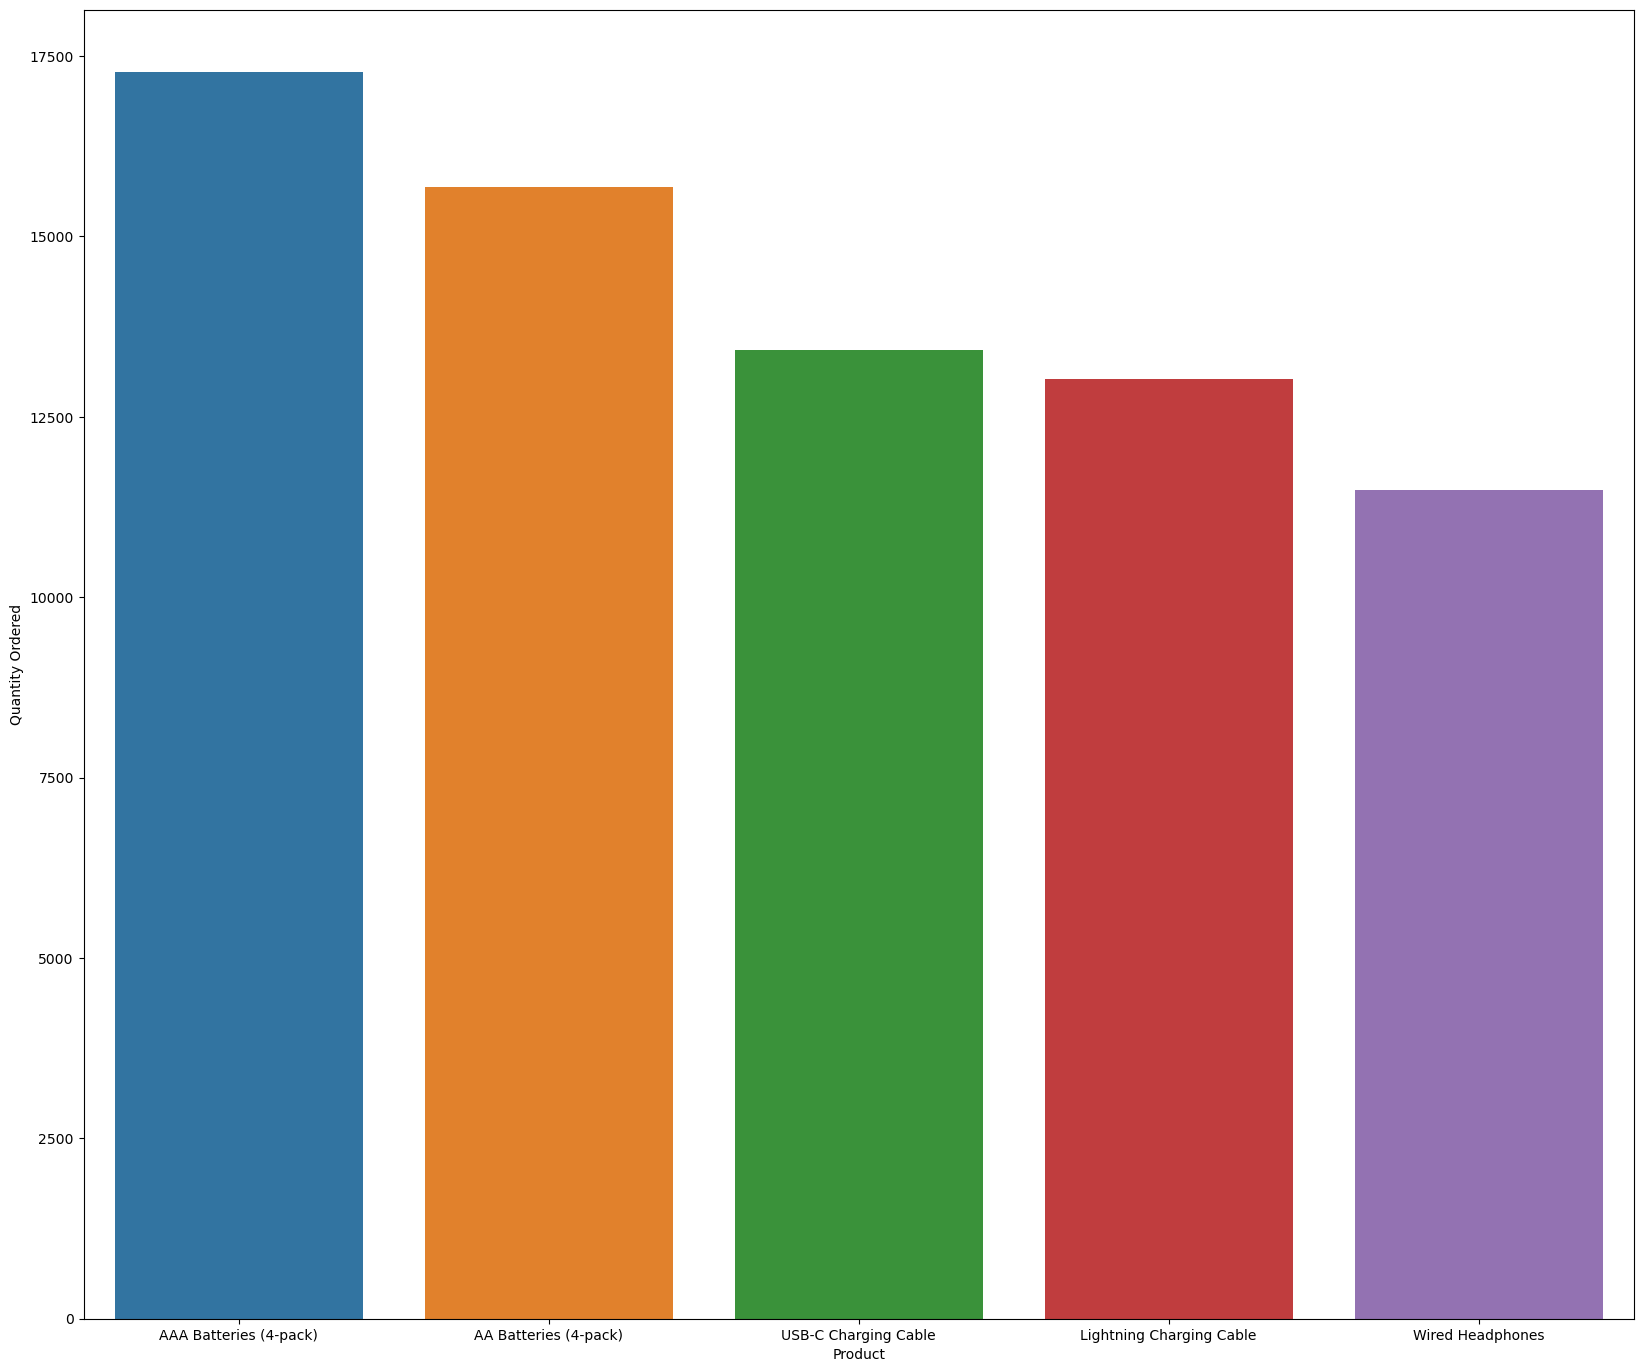

In [67]:
values = grp_product.head(5)
plt.figure(figsize = (20,17))
sns.barplot(data =values, x = 'Product', y ='Quantity Ordered')



<Axes: xlabel='Product', ylabel='count'>

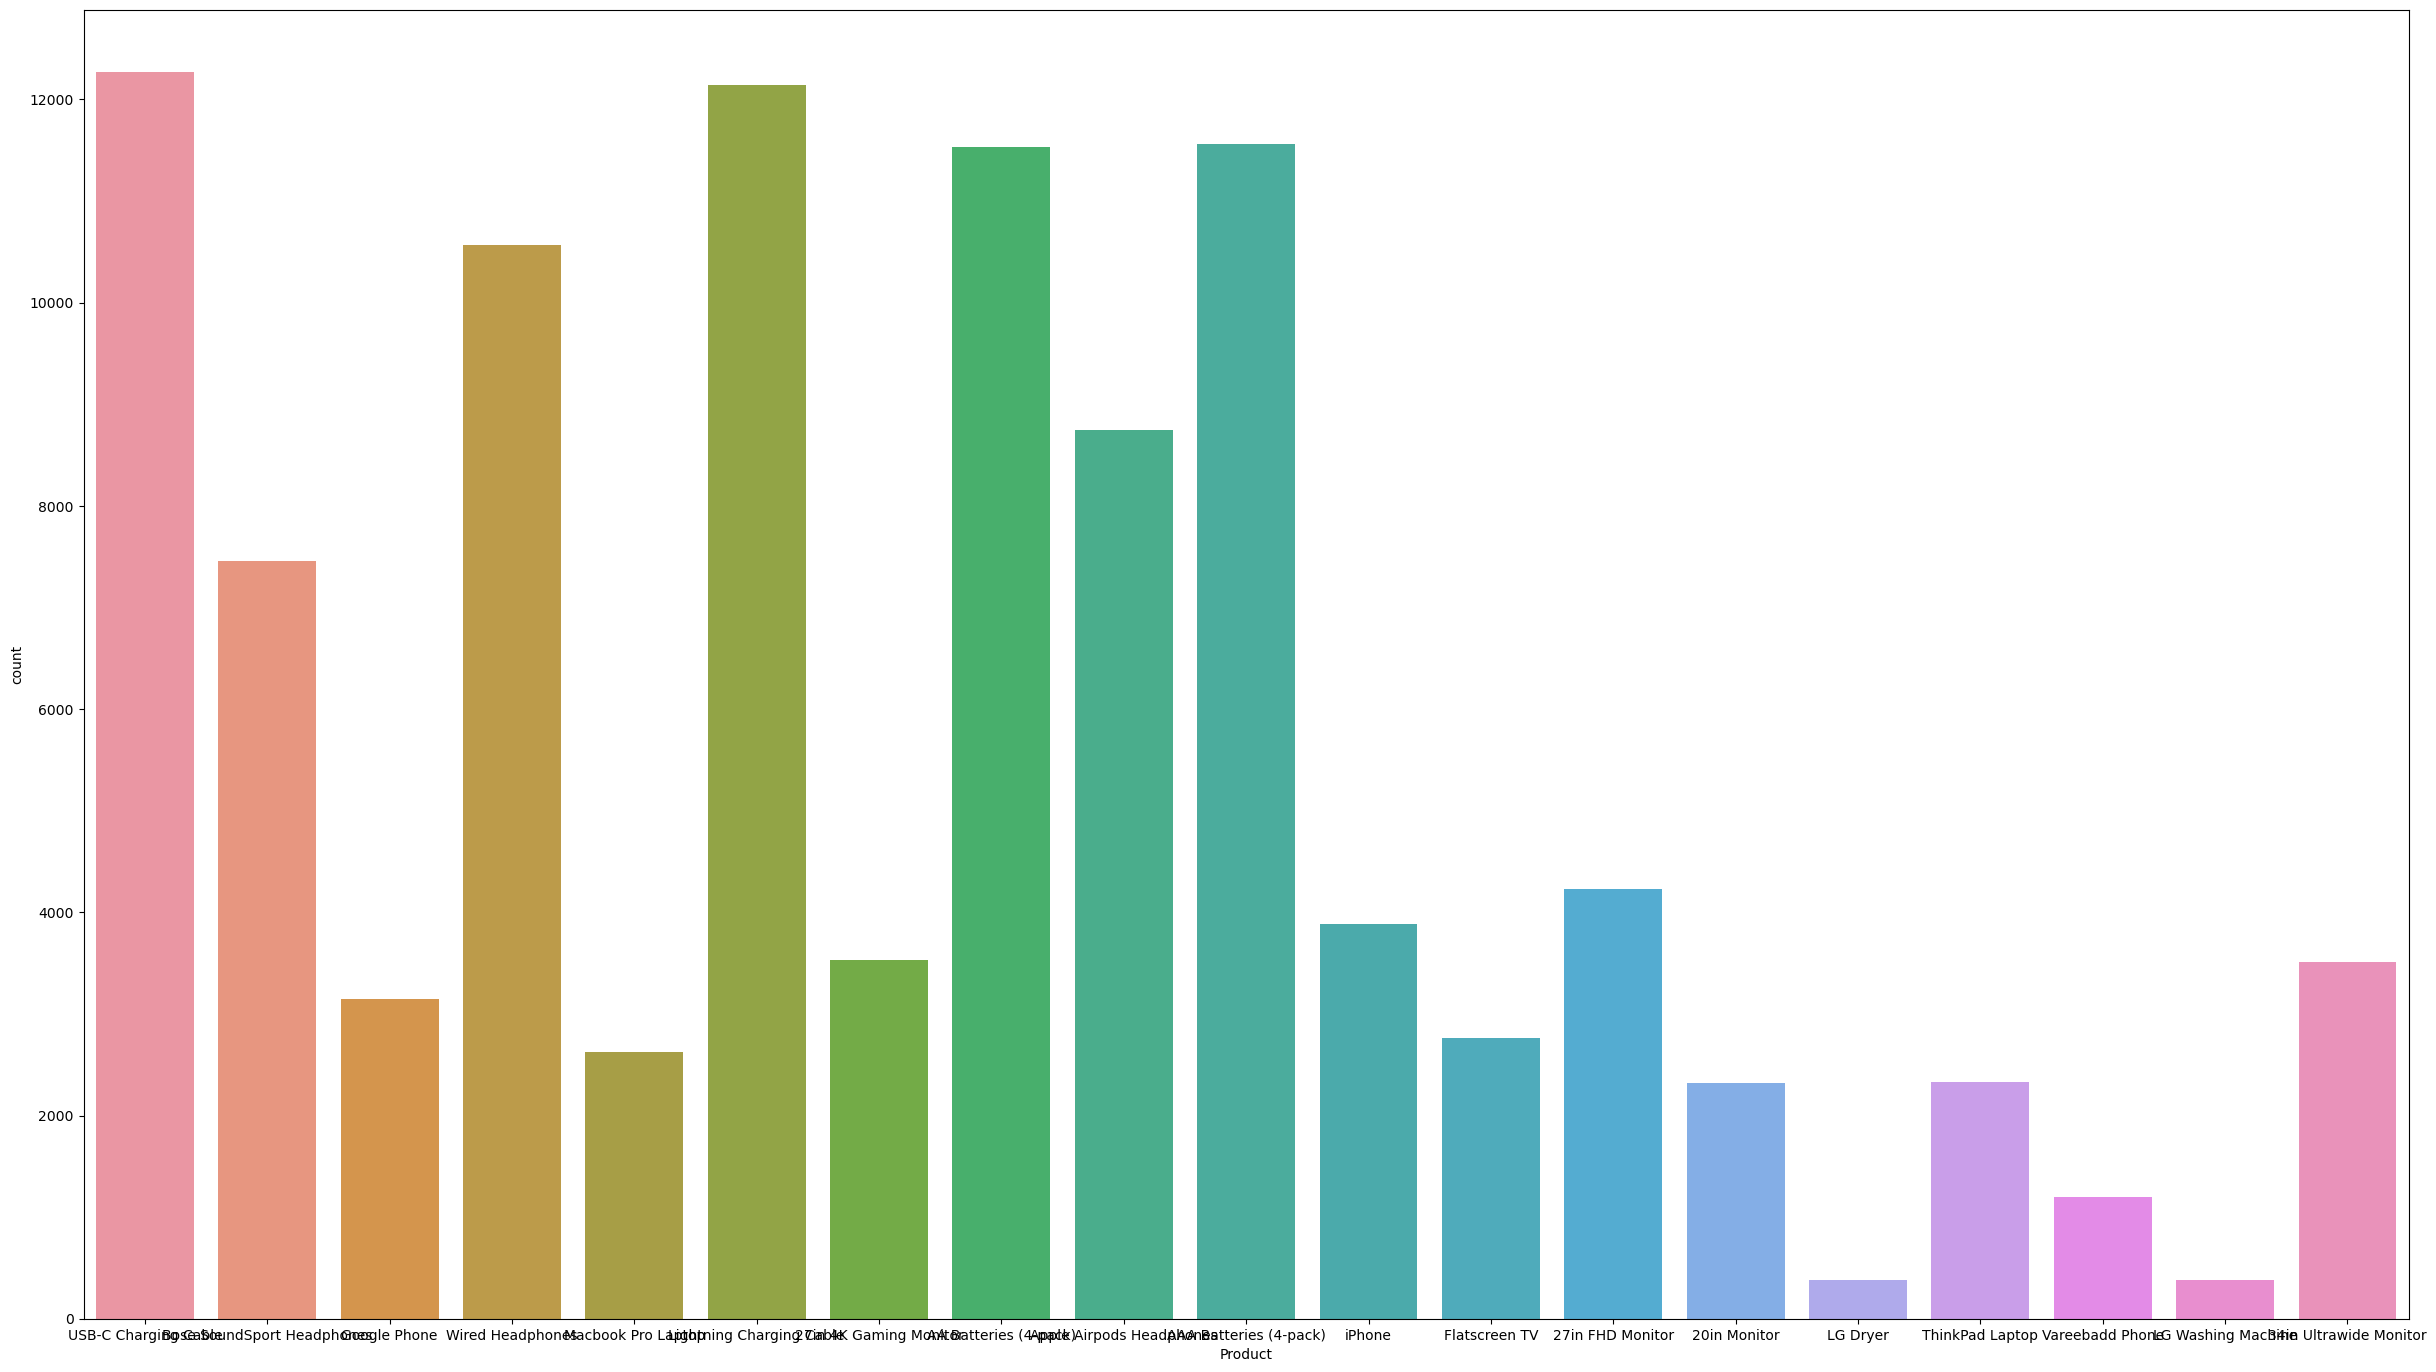

In [71]:
plt.figure(figsize = (30,17))
sns.countplot(data = df , x = 'Product')